In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import MaxPooling2D
from sklearn.model_selection import train_test_split
import zipfile
from PIL import Image
from sklearn.model_selection import KFold
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow import keras

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation = "softmax")   #Adding the Output Layer
])

In [3]:
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [4]:
bs=30         #Setting batch size
train_dir = "D:/JOB/Lubeck/Task/tanvirf/UnionInstruments/Preprocessed Dataset/Model/Train"   #Setting training directory
validation_dir = "D:/JOB/Lubeck/Task/tanvirf/UnionInstruments/Preprocessed Dataset/Model/Test"   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(180,180))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))

Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [5]:
history = model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=150 // bs,epochs=30,validation_steps=50 // bs,verbose=2)

Epoch 1/30
5/5 - 4s - loss: 0.8239 - acc: 0.4600 - val_loss: 0.7031 - val_acc: 0.4667 - 4s/epoch - 721ms/step
Epoch 2/30
5/5 - 2s - loss: 0.6995 - acc: 0.4733 - val_loss: 0.6871 - val_acc: 0.6000 - 2s/epoch - 348ms/step
Epoch 3/30
5/5 - 2s - loss: 0.6934 - acc: 0.5214 - val_loss: 0.6935 - val_acc: 0.5000 - 2s/epoch - 318ms/step
Epoch 4/30
5/5 - 2s - loss: 0.6876 - acc: 0.5467 - val_loss: 0.7056 - val_acc: 0.4333 - 2s/epoch - 336ms/step
Epoch 5/30
5/5 - 2s - loss: 0.6914 - acc: 0.5643 - val_loss: 0.6905 - val_acc: 0.5333 - 2s/epoch - 312ms/step
Epoch 6/30
5/5 - 2s - loss: 0.6980 - acc: 0.5067 - val_loss: 0.6886 - val_acc: 0.6000 - 2s/epoch - 333ms/step
Epoch 7/30
5/5 - 2s - loss: 0.6930 - acc: 0.5400 - val_loss: 0.7012 - val_acc: 0.4000 - 2s/epoch - 326ms/step
Epoch 8/30
5/5 - 2s - loss: 0.6906 - acc: 0.5467 - val_loss: 0.6695 - val_acc: 0.6667 - 2s/epoch - 334ms/step
Epoch 9/30
5/5 - 2s - loss: 0.6970 - acc: 0.4933 - val_loss: 0.6717 - val_acc: 0.6333 - 2s/epoch - 325ms/step
Epoch 10/3

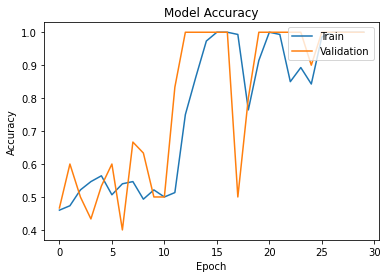

In [6]:
# plot the training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


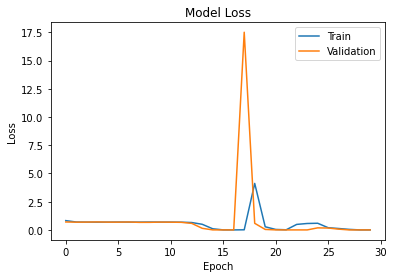

In [7]:
# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [8]:
# Load and preprocess the image you want to test
img = keras.preprocessing.image.load_img('801.jpg', target_size=(180, 180))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # normalize pixel values

# Use the model to make predictions on the image
predictions = model.predict(img_array)

# Print the predicted class label and probability for each class
class_labels = ['DW', 'TW']
for i in range(len(class_labels)):
    print("{}: {:.2f}%".format(class_labels[i], predictions[0][i]*100))


1/1 [==============================] - 0s 99ms/step
DW: 0.01%
TW: 99.99%


In [9]:
# Load and preprocess the image you want to test
img = keras.preprocessing.image.load_img('810.jpg', target_size=(180, 180))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # normalize pixel values

# Use the model to make predictions on the image
predictions = model.predict(img_array)

# Print the predicted class label and probability for each class
class_labels = ['DW', 'TW']
for i in range(len(class_labels)):
    print("{}: {:.2f}%".format(class_labels[i], predictions[0][i]*100))

1/1 [==============================] - 0s 33ms/step
DW: 100.00%
TW: 0.00%


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0